In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as io
import cv2
import torch
import os
import sys
from utils.utils_funcitons import *
device= "cuda" if torch.cuda.is_available() else "cpu"

dataset_path = r'.\dataset\Task1_Image_detection'

train_images_path = os.path.join(dataset_path, rf'train\images')
train_labels_path = os.path.join(dataset_path, rf'train\labels')
valid_images_path = os.path.join(dataset_path, rf'valid\images')
valid_labels_path = os.path.join(dataset_path, rf'valid\labels')
test_images_path = os.path.join(dataset_path, rf'test\images')
test_labels_path = os.path.join(dataset_path, rf'test\labels')

saved_model_path = rf'.\models'

### 1. Dataset exploration

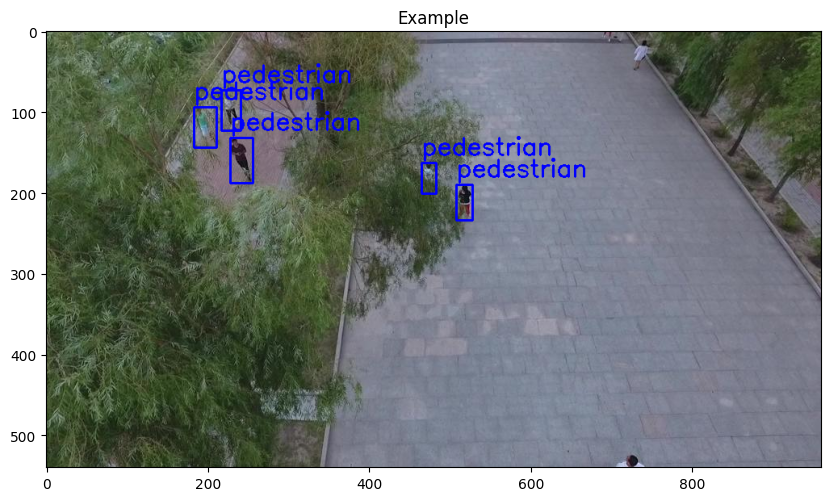

In [9]:
random_idx = np.random.randint(1000)
paths = os.listdir(train_images_path)
paths = [path.split(sep='.')[0] for path in paths] #Remove extension. Image and annotations have the same filename

random_image_path = os.path.join(train_images_path, f'{paths[random_idx]}.jpg')
random_label_path = os.path.join(train_labels_path, f'{paths[random_idx]}.txt')

random_image = read_image_file(random_image_path)
random_labels = read_labels_file(random_label_path)
#print(random_labels)
#display_image_w_annotations(random_image, random_labels, max_annot=5)
display_image_w_annotations_YOLO(random_image, random_labels, max_annot=5)

## Train YOLOv8 on Custom Dataset

In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
# Train the model
model.train(data=r'dataset\Task1_Image_detection\data.yaml', epochs=100, batch=16, save_period=20, device=device)#, imgsz=640)

Ultralytics YOLOv8.1.0 🚀 Python-3.10.0 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset\Task1_Image_detection\data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=20, cache=False, device=cuda, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 6.82MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    753262  ultralytics.nn.modules.head.Detect           [10, [64, 128, 256]]          
Model summary: 225 layers, 3012798 parameters, 3012782 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\labels... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:07<00:00, 896.96it/s] 

train: WARNING ⚠️ D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed


train: New cache created: D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\train\labels.cache


val: Scanning D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\valid\labels... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<00:00, 754.76it/s]


val: New cache created: D:\Nicolas\Proyectos-IA\CV_projects\VisDrone\dataset\Task1_Image_detection\valid\labels.cache
Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.31G      1.835      2.498      1.063        715        640: 100%|██████████| 405/405 [01:22<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.91it/s]

                   all        548      38759      0.367      0.143       0.11     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.95G      1.739      1.637      1.017        655        640: 100%|██████████| 405/405 [01:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.96it/s]

                   all        548      38759      0.198      0.203      0.145     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.54G      1.761      1.562      1.015        398        640: 100%|██████████| 405/405 [01:08<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]

                   all        548      38759      0.234      0.205      0.155      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.23G      1.738      1.505      1.009        611        640: 100%|██████████| 405/405 [01:08<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.27it/s]

                   all        548      38759      0.269      0.228      0.194      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.4G      1.695      1.431      0.997        573        640: 100%|██████████| 405/405 [01:07<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.54it/s]

                   all        548      38759      0.291      0.231      0.206      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.19G      1.663      1.381     0.9864        560        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.92it/s]

                   all        548      38759      0.294      0.227      0.201      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.97G      1.634      1.333     0.9801        483        640: 100%|██████████| 405/405 [01:04<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.76it/s]

                   all        548      38759      0.331      0.255      0.229      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.26G      1.617      1.303     0.9747        638        640: 100%|██████████| 405/405 [01:07<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.66it/s]

                   all        548      38759      0.314      0.247      0.223      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.58G       1.59      1.277     0.9687        241        640: 100%|██████████| 405/405 [01:07<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.81it/s]

                   all        548      38759      0.322      0.262      0.234       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.11G      1.579       1.25     0.9662        422        640: 100%|██████████| 405/405 [01:06<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.85it/s]

                   all        548      38759      0.321      0.262      0.235      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.33G      1.572      1.241     0.9655        355        640: 100%|██████████| 405/405 [01:06<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.82it/s]

                   all        548      38759      0.353      0.262      0.246      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.64G      1.547      1.212     0.9624        457        640: 100%|██████████| 405/405 [01:07<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.63it/s]

                   all        548      38759      0.345       0.26      0.247       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.86G      1.549      1.205      0.958        341        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.65it/s]

                   all        548      38759      0.356      0.273      0.258      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.79G      1.543      1.193     0.9554        812        640: 100%|██████████| 405/405 [01:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.82it/s]

                   all        548      38759      0.363      0.276      0.264      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.54G       1.53      1.177     0.9542        272        640: 100%|██████████| 405/405 [01:05<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.76it/s]

                   all        548      38759      0.378       0.28      0.268      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.88G      1.521      1.169     0.9526        526        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.85it/s]

                   all        548      38759      0.369      0.283      0.268      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.48G      1.519      1.158     0.9513        683        640: 100%|██████████| 405/405 [01:08<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.72it/s]

                   all        548      38759      0.378      0.281      0.271      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.96G      1.515      1.152     0.9477        816        640: 100%|██████████| 405/405 [01:08<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.86it/s]

                   all        548      38759      0.376      0.282      0.273      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.21G      1.504      1.136     0.9463        652        640: 100%|██████████| 405/405 [01:08<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.79it/s]

                   all        548      38759      0.391      0.291      0.281      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        10G      1.493      1.123     0.9459        724        640: 100%|██████████| 405/405 [01:08<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.79it/s]

                   all        548      38759      0.378        0.3      0.286      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       5.8G      1.493      1.125     0.9436        702        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.79it/s]

                   all        548      38759      0.385      0.293      0.279      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       8.2G      1.488      1.119     0.9425        376        640: 100%|██████████| 405/405 [01:08<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.83it/s]

                   all        548      38759      0.383      0.283      0.271      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.73G      1.476      1.108     0.9395        533        640: 100%|██████████| 405/405 [01:08<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.79it/s]

                   all        548      38759      0.369       0.29      0.274      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.47G      1.477      1.104     0.9389        641        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.90it/s]

                   all        548      38759      0.378      0.299      0.286      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.33G      1.469      1.097     0.9386        451        640: 100%|██████████| 405/405 [01:08<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.84it/s]

                   all        548      38759      0.392      0.296      0.285      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.04G      1.473      1.097     0.9389        477        640: 100%|██████████| 405/405 [01:08<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.65it/s]

                   all        548      38759      0.387      0.297      0.288      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       6.8G      1.461      1.088      0.937        981        640: 100%|██████████| 405/405 [01:08<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.59it/s]

                   all        548      38759      0.379      0.289      0.283      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.84G       1.46      1.083     0.9356        626        640: 100%|██████████| 405/405 [01:08<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.75it/s]

                   all        548      38759      0.393        0.3      0.292      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.75G      1.457      1.078     0.9359        671        640: 100%|██████████| 405/405 [01:08<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.76it/s]

                   all        548      38759      0.396        0.3      0.293      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.19G      1.454      1.071     0.9332        407        640: 100%|██████████| 405/405 [01:07<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.79it/s]

                   all        548      38759      0.405      0.305      0.297      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.57G      1.455      1.076     0.9334        351        640: 100%|██████████| 405/405 [01:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.86it/s]

                   all        548      38759      0.415      0.295      0.291      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.1G       1.45      1.064      0.931        487        640: 100%|██████████| 405/405 [01:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.94it/s]

                   all        548      38759      0.406      0.303      0.297      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.02G      1.446      1.064     0.9337        443        640: 100%|██████████| 405/405 [01:06<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:03<00:00,  4.84it/s]

                   all        548      38759      0.396      0.304      0.297       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.22G      1.444      1.054     0.9302       2002        640:  93%|█████████▎| 377/405 [01:00<00:04,  6.05it/s]

In [ ]:
results = model.predict(cv2.cvtColor(random_image, cv2.COLOR_RGB2BGR), save=True)